In [3]:
import cv2
import cvzone
import numpy as np
import matplotlib.pyplot as plt

ground_color = None

img = cv2.imread("test1.webp")
if ground_color is None:
    ground_color = img[int(img.shape[0]/2) ,int(img.shape[1]/2)]
img_contours = img.copy()
dh, dw, _ = img.shape



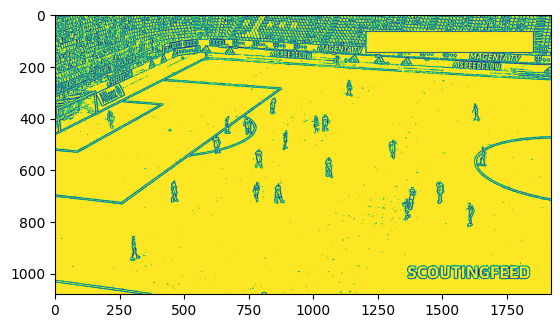

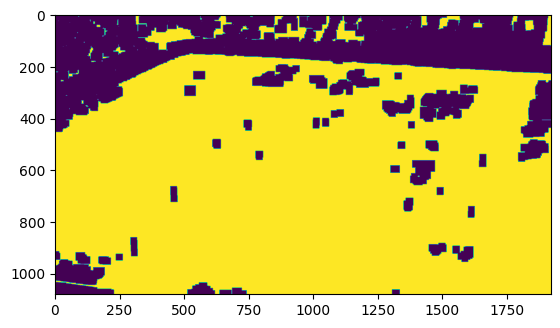

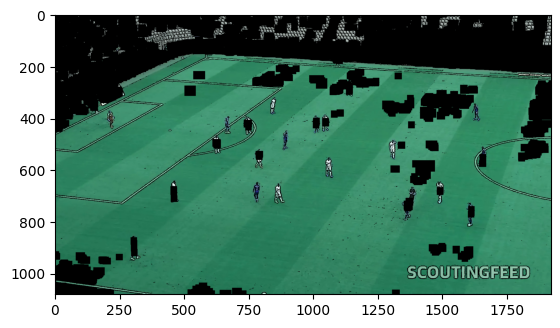

In [29]:

#converting into hsv image
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

#hue histogram
#plt.hist(hsv[:,:,0].flatten(),bins=256)

h_l,h_h = np.percentile(hsv[:,:,0],[20,80])
s_l,s_h = np.percentile(hsv[:,:,1],[5,95])
v_l,v_h = np.percentile(hsv[:,:,2],[15,85])

#green range
#lower_green = np.array([27,141,129]) # This value is for 1st image
#upper_green = np.array([44, 169, 152]) # This value is for 1st image
lower_green = np.array([h_l,s_l,v_l])
upper_green = np.array([h_h,s_h,v_h])

#Define a mask ranging from lower to uppper
mask = cv2.inRange(hsv, lower_green, upper_green)
#Do masking

plt.figure()
adt_mask = cv2.adaptiveThreshold(img[:,:,0],255,adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,thresholdType=cv2.THRESH_BINARY,blockSize=9,C=5)
plt.imshow(adt_mask)
plt.figure()
mmask = cv2.dilate(mask,cv2.getStructuringElement(cv2.MORPH_RECT,(25,25)))
mmmask = cv2.erode(mmask,cv2.getStructuringElement(cv2.MORPH_RECT,(25,25)))
plt.imshow(mmmask)
#convert to hsv to gray
composite_mask = cv2.bitwise_and(mmmask,adt_mask)
res = cv2.bitwise_and(img, img, mask=composite_mask)
res_bgr = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
plt.figure()
plt.imshow(res)
img_blur = cv2.medianBlur(res_bgr ,5)
img_gray = cv2.cvtColor(img_blur ,cv2.COLOR_BGR2GRAY)



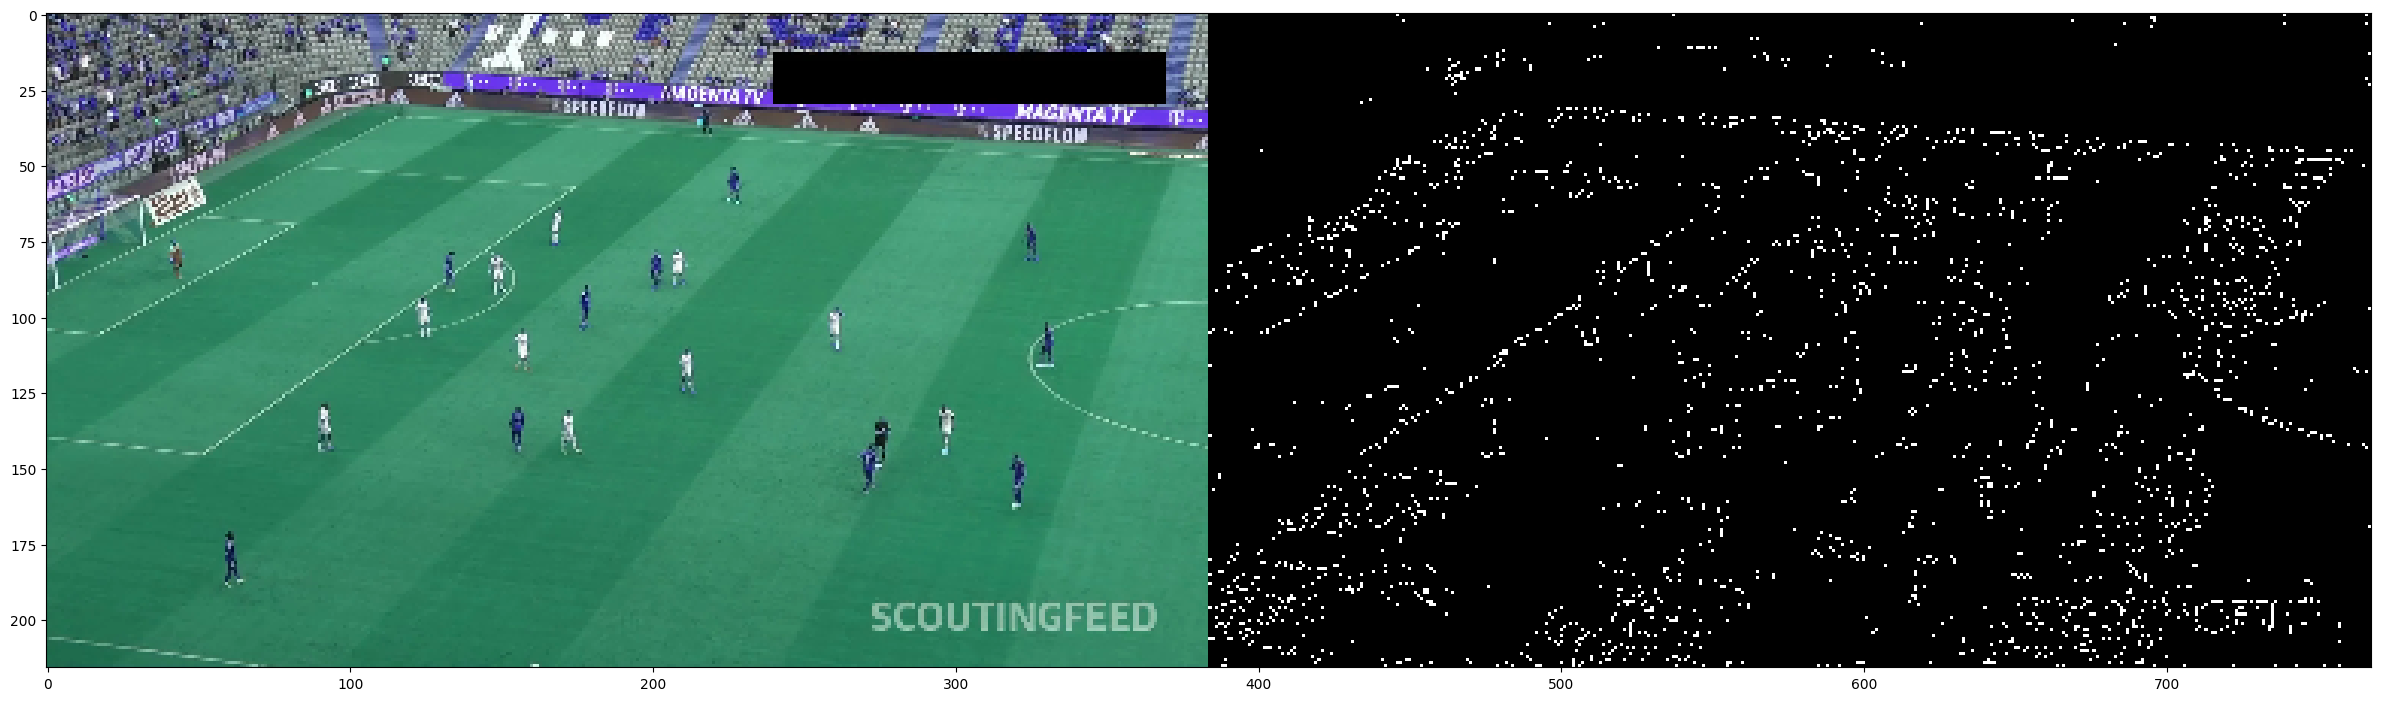

In [7]:
#threshold1 = cv2.getTrackbarPos("threshold1","Parameters")
# threshold2 = cv2.getTrackbarPos("threshold2","Parameters")
v = np.median(img_gray)
sigma = 0.33
#---- apply optimal Canny edge detection using the computed median----
lower_thresh = int(max(0, (1.0 - sigma) * v))
upper_thresh = int(min(255, (1.0 + sigma) * v))
# print(threshold1,threshold2)

img_canny = cv2.Canny(img_gray,lower_thresh,upper_thresh)

img_stack = cvzone.stackImages(([img,img_canny]) ,2,0.2)

plt.figure(figsize=(30,10))
plt.imshow(img_stack)